In [29]:
import pandas as pd

client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

print(" Formal Missing Values ")
print(f"Client Data:\n{client_df.isnull().sum().sum()} missing values")
print(f"Price Data:\n{price_df.isnull().sum().sum()} missing values")

print("\n'MISSING' String Placeholders in Client Data ")
missing_placeholders = (client_df == 'MISSING').sum()
print(missing_placeholders[missing_placeholders > 0])

 Formal Missing Values 
Client Data:
0 missing values
Price Data:
0 missing values

'MISSING' String Placeholders in Client Data 
channel_sales    3725
origin_up          64
dtype: int64


In [31]:
import numpy as np

client_df.replace('MISSING', np.nan, inplace=True)

channel_sales_mode = client_df['channel_sales'].mode()[0]
origin_up_mode = client_df['origin_up'].mode()[0]

client_df['channel_sales'] = client_df['channel_sales'].fillna(channel_sales_mode)
client_df['origin_up'] = client_df['origin_up'].fillna(origin_up_mode)

print("Remaining missing values:")
print(client_df[['channel_sales', 'origin_up']].isnull().sum())

client_df.to_csv('client_data_cleaned.csv', index=False)

Remaining missing values:
channel_sales    0
origin_up        0
dtype: int64


In [33]:
print("Client Data Statistics:")
display(client_df.describe())

print("\nPrice Data Statistics:")
display(price_df.describe())

print("\nData Types:")
print(client_df.dtypes)

Client Data Statistics:


,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000



Price Data Statistics:


,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221



Data Types:
id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up            

C:\Users\shahz\AppData\Local\Temp\ipykernel_4044\3692336571.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=client_df, palette='viridis')


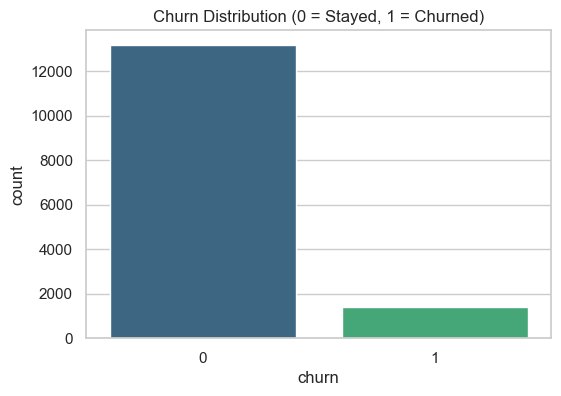

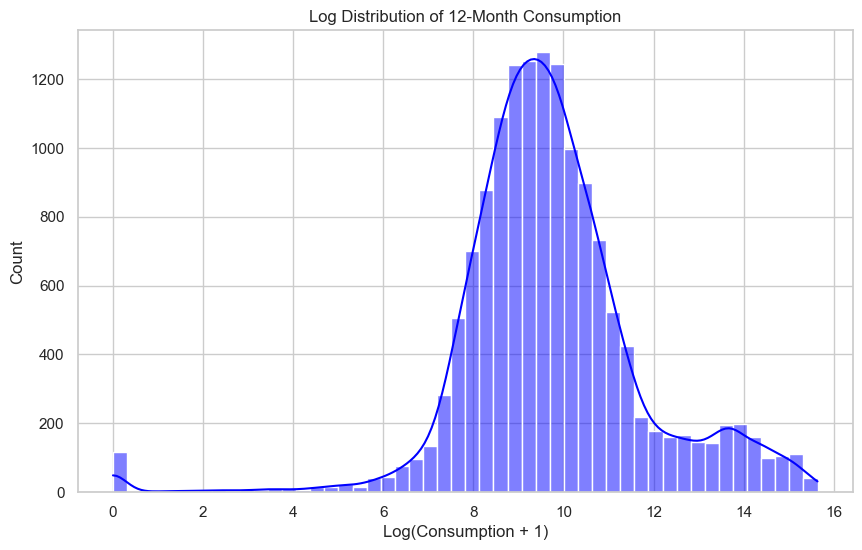

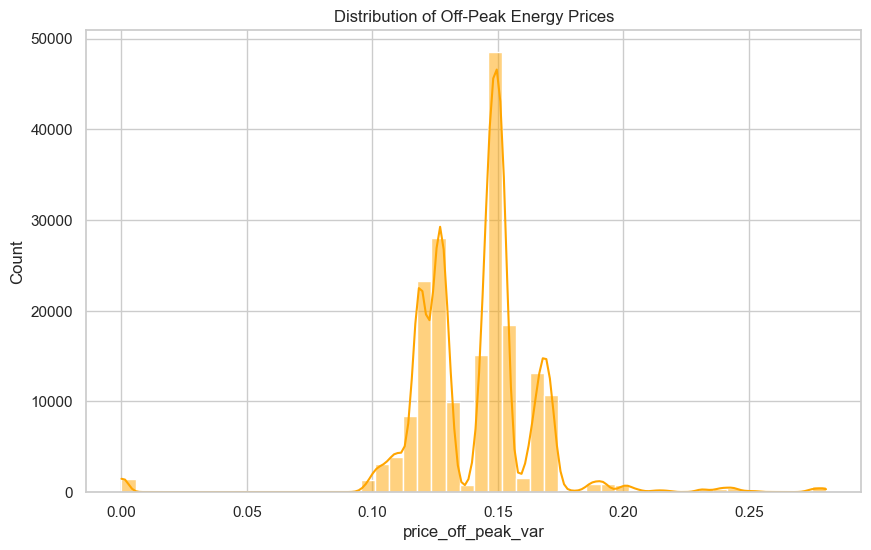

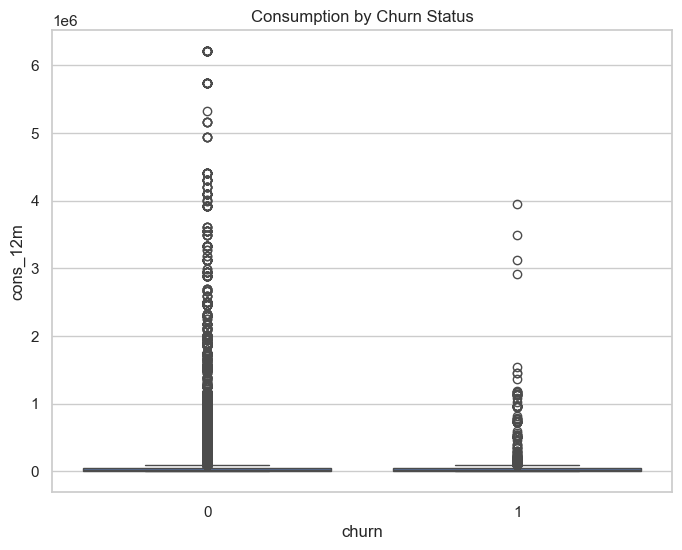


Skewness of Numeric Columns:
cons_12m                           5.997308
cons_gas_12m                       9.597530
cons_last_month                    6.391407
forecast_cons_12m                  7.155853
forecast_cons_year                16.587990
forecast_discount_energy           5.155098
forecast_meter_rent_12m            1.505148
forecast_price_energy_off_peak    -0.119586
forecast_price_energy_peak        -0.014331
forecast_price_pow_off_peak       -4.998772
imp_cons                          13.198799
margin_gross_pow_ele               4.472632
margin_net_pow_ele                 4.473326
nb_prod_act                        8.636878
net_margin                        36.569515
num_years_antig                    1.446214
pow_max                            5.786785
churn                              2.720715
dtype: float64


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=client_df, palette='viridis')
plt.title('Churn Distribution (0 = Stayed, 1 = Churned)')
plt.show()

# Consumption Distribution (log-transformed)
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(client_df['cons_12m']), bins=50, kde=True, color='blue')
plt.title('Log Distribution of 12-Month Consumption')
plt.xlabel('Log(Consumption + 1)')
plt.show()

# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(price_df['price_off_peak_var'], bins=50, kde=True, color='orange')
plt.title('Distribution of Off-Peak Energy Prices')
plt.show()

# Churn vs Consumption
plt.figure(figsize=(8,6))
sns.boxplot(x='churn', y='cons_12m', data=client_df)
plt.title('Consumption by Churn Status')
plt.show()

# Check Skewness of numeric columns
numeric_cols = client_df.select_dtypes(include=np.number).columns
print("\nSkewness of Numeric Columns:")
print(client_df[numeric_cols].skew())


In [27]:
#client_df.to_csv('clean_data_after_eda.csv', index=False)